# Lead Scoring Case Study Using Multi Logistic Regression

## Problem Statement

#### Company X Education is an online education plateform which specialises in selling online courses to industry professionals. The company has its course on various various websites and search engines. People who fill up details related to them (such as name, phone number, email address etc) or are referred by other clients are considered as leads (potential clients). X Education receives plenty of leads, however the leads being converted into clients is extremely low. In a 100 leads per day, only 30 of them are converted to clients.  

## Business Objectives

#### The Three Business Objectives in this Case Study are: 

*    To help X Education select the most potential leads, i.e ‘Hot Leads’ which are likely to be converted into clients.
*    To build a model in such a way that each lead is assigned a lead score where the higher lead score signals higher chances of conversion an lower lead score signals lower chances of conversions.
*    The target lead conversion rate should be around 80%.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the libraries to read and analyze the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing libraries for statistical analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Reading and Understanding Data

In [4]:
#Uploading the Data Set
leads = pd.read_csv(r"C:\Users\arunk\OneDrive\Desktop\SQL - My Practice\Lead+Scoring+Case+Study\Lead Scoring Assignment\leads.csv")

##### Checking the data of the dataset

In [5]:
# Inspecting the data set
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Inspecting the data set
leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [7]:
# Info about the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking the shape of dataset
leads.shape

(9240, 37)

#### Checking The Data Quality and its values

In [9]:
# Check for null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Check for missing values
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# Check for duplicates and dropping them if any
leads.drop_duplicates(inplace = True)
leads.shape

(9240, 37)

In [12]:
#Describing the columns of dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preprocessing

In [13]:
# Replacing the value "Select" as null
leads = leads.replace("Select", np.nan)

In [14]:
# Percentage values of missing of all columns
missing_values = {}
for x in leads.columns:
    y = leads[x].isna().sum()/len(leads.index)*100
    missing_values[x] = y
missing_values_df = pd.Series(missing_values)
missing_values_df.sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [15]:
#Assigning all the columns having missing values greater than 45% to a list
columns_name = []
for x in leads.columns:
    if leads[x].isna().sum() != 0:
        y = leads[x].isna().sum()/len(leads.index)*100
        if y > 45:
            columns_name += [x]
len(columns_name)

7

In [16]:
#Inspecting the list
columns_name

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [17]:
#Dropping all the columns having missing values greater than 45%
for x in columns_name:
    leads.drop(x, axis = 1, inplace = True)


In [18]:
#Droping the Columns
leads.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [19]:
#Shape check after dropping the columns
leads.shape

(9240, 28)

In [20]:
#Calculating the missing values percentage of each column
missing_values = {}
for x in leads.columns:
    y = leads[x].isna().sum()/len(leads.index)*100
    missing_values[x] = y
missing_values_df = pd.Series(missing_values)
missing_values_df.sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [21]:
# Inspecting values
leads.City.value_counts(normalize = True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [22]:
#Replacing the null values
leads.City = leads.City.replace(np.nan, "Mumbai")

In [23]:
#Value Check after replacing
leads.City.value_counts(dropna = False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
#Inspecting Values
leads.Specialization.value_counts(normalize = True, dropna = False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [25]:
#Replacing the null values
leads.Specialization = leads.Specialization.replace(np.nan, "Others")

In [26]:
#Inspecting Values after replacing
leads.Specialization.value_counts(dropna = False)

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
#Inspecting Values
leads.Tags.value_counts(normalize = True, dropna = False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [28]:
#Replacing the null values
leads.Tags = leads.Tags.replace(np.nan, "Will revert after reading the email")

In [29]:
#Inspecting values after replacing
leads.Tags.value_counts(dropna = False)

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [30]:
#Inspecting Values
leads["What matters most to you in choosing a course"].value_counts(normalize = True, dropna = False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
#Replacing null values
leads["What matters most to you in choosing a course"] = leads["What matters most to you in choosing a course"].replace(np.nan, "Better Career Prospects")

In [32]:
#Inspecting values after replacing
leads["What matters most to you in choosing a course"].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
#Inspecting Values
leads["What is your current occupation"].value_counts(normalize = True, dropna = False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [34]:
#Replacing null values
leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan, "Unemployed")

In [35]:
#Inspecting after replacing
leads["What is your current occupation"].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
#Inspecting Values
leads.Country.value_counts(normalize = True, dropna = False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [37]:
#Replacing Null Values
leads.Country = leads.Country.replace(np.nan, "India")

In [38]:
#Inspecting after replacing
leads.Country.value_counts(dropna = False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [39]:
#Calculating missing values percentages after replacing
missing_values = {}
for x in leads.columns:
    y = leads[x].isnull().sum()/len(leads.index)*100
    missing_values[x] = y
missing_values_df = pd.Series(missing_values)
missing_values_df.sort_values(ascending = False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Lead Origin                                      0.000000
X Education Forums                               0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
City                                             0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Tags                                             0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
Magazine                                         0.000000
Newspaper Arti

In [40]:
#Dropping the rows with null values
leads.dropna(inplace = True)

In [41]:
#Shape Check
leads.shape

(9074, 28)

In [42]:
#Inspecting the data after the changes
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

### Exploratory Data Analysis

In [43]:
#Categorical Variables
cat_var = []
for i in leads.select_dtypes(include =["object"]).columns:
    cat_var += [i]
len(cat_var)

24

In [44]:
cat_var_drop = []

In [45]:
#Defining a function for visualization
def predictors_plots(col):
    plt.figure(figsize= (12,6))
    plt.subplot(1,2,1)
    sns.countplot(x = col,data = leads)
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)
    sns.countplot(x = col,hue = "Converted", data = leads)
    plt.xticks(rotation = 90)
    plt.show()

### Lead Origin

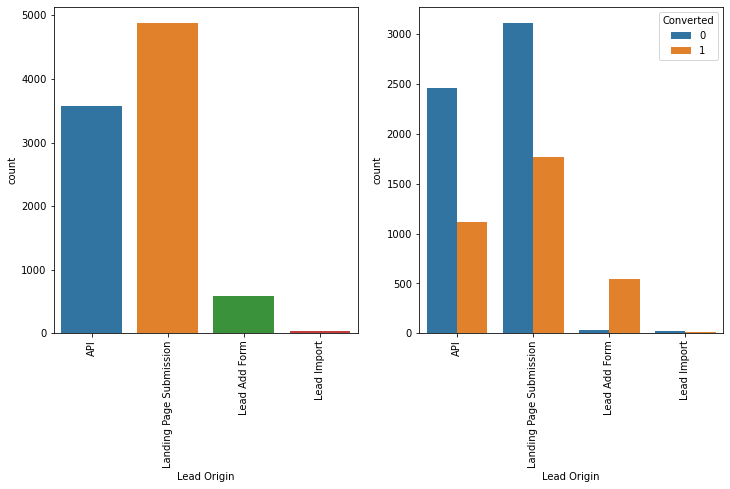

In [46]:
#Visualizing the variable
predictors_plots("Lead Origin")

###### The Figures above shows that:
* The Landing Page Submission contributes the most to the Lead Orgin (almost 5000), followed by API (around 3750), Lead Add Form and Lead Import (both less than 600).
* The converted mostly comes from Landing Page Submission, followed by API and the Lead Add Form. The not converted also comes mainly from Landing Page Submission, followed by API.



### Lead Source

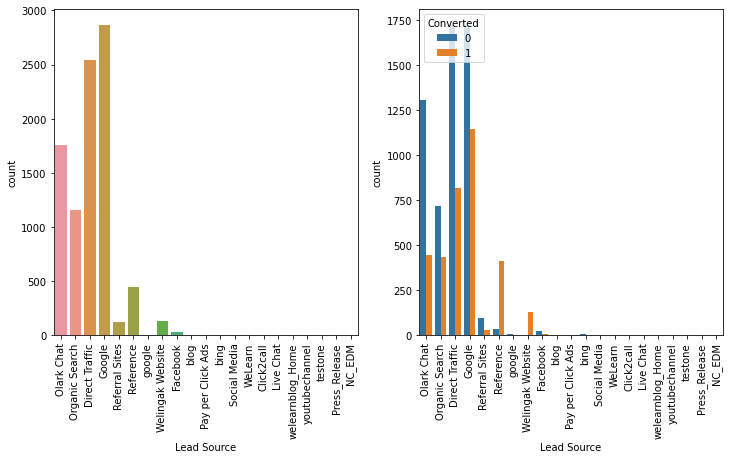

In [47]:
#Visualizing the variable
predictors_plots("Lead Source")

In [48]:
#Replacing the value for accuracy
leads["Lead Source"] = leads["Lead Source"].replace("google","Google")

In [49]:
#Creating a list of valuesto be clubbed
others_list = []
for i in leads["Lead Source"].unique():
    if leads["Lead Source"][leads["Lead Source"] == i].count()<=30:
        others_list += [i]
print(others_list)


['blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM']


In [50]:
#Clubbing the values
leads["Lead Source"] = leads["Lead Source"].replace(others_list,"Others")

In [51]:
#Inspecting values after checking
leads["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

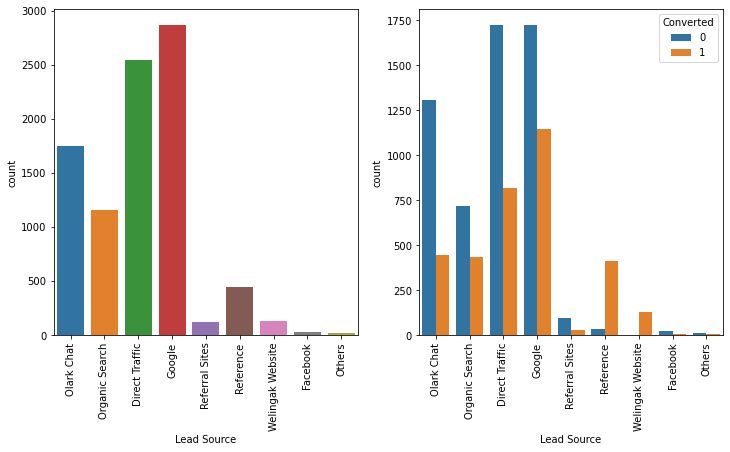

In [52]:
#Visualizing the variable
predictors_plots("Lead Source")

###### The above figures suggests that:
*   The top Lead Source comes from Google (almost 3000), Direct Traffic (around (2510) and Olark Chart (a little less than 2000) respectively.
*   Most of the converted leads comes from Google and Direct Traffic and  the not converted comes mainly from Google, Direct Traffic and Olark Chart.

*   The graphs above confirms the same trend as explained earlier.




### Do Not Email

In [53]:
#Visualizing the variable
leads["Do Not Email"].value_counts(normalize = True)*100

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64

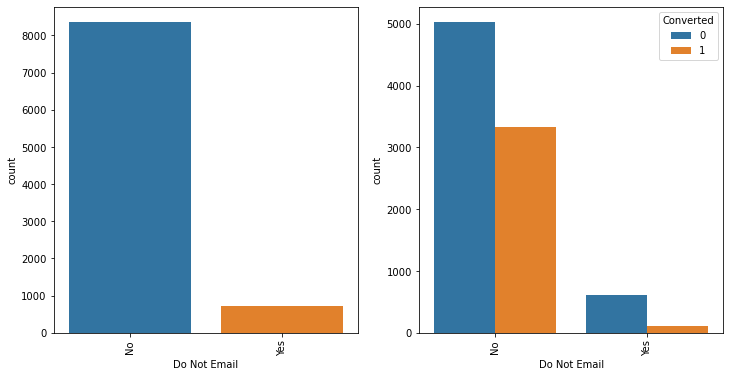

In [54]:
#Visualizing the variable
predictors_plots("Do Not Email")

The above figures show that:
*   Most of the lead (around 8000) said no to Do Not Mail whereas a little less than 1000 leads said yes to Do Not Mail
*  A little less than 3500 converted leads came from the no category and 5000 non- converted leads also came from the same category.



### Do Not Call

In [55]:
#Visualizing the variable
leads["Do Not Call"].value_counts(normalize = True)*100

No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64

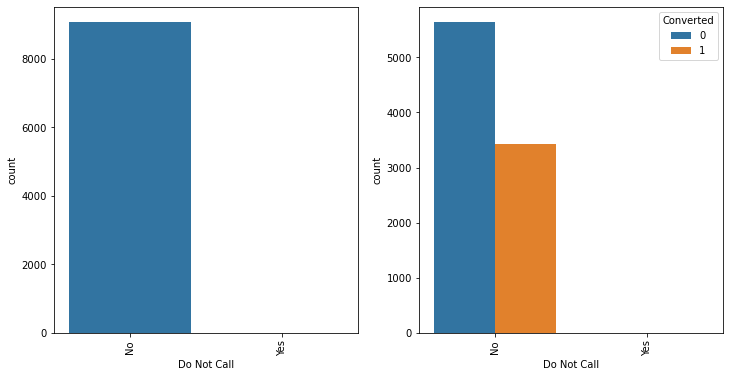

In [56]:
#Visualizing the variable
predictors_plots("Do Not Call")

In [57]:
#Dropping 
cat_var_drop.append("Do Not Call")


*   Almost all the leads (around 8600)  said No to Do Not Call and around 3500 converted leads came from the no category.



### Last Activity

In [58]:
#Inspecting the values in the variable
leads["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

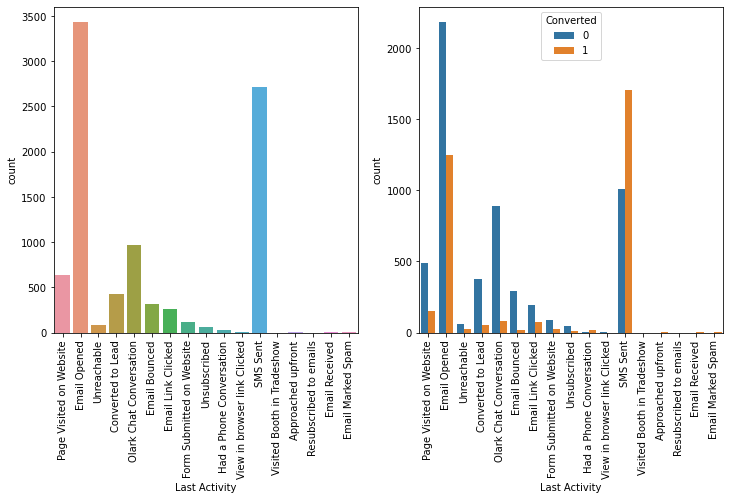

In [59]:
#Visualizing the variable
predictors_plots("Last Activity")

In [60]:
#Creating a list of values to be clubbed
others_list = []
for i in leads["Last Activity"].unique():
    if leads["Last Activity"][leads["Last Activity"] == i].count()<=100:
        others_list += [i]
print(others_list)

['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam']


In [61]:
#Clubbing the values
leads["Last Activity"] = leads["Last Activity"].replace(others_list,"Other_Activity")

In [62]:
#Inspecting the values after clubbing
leads["Last Activity"].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Other_Activity                191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

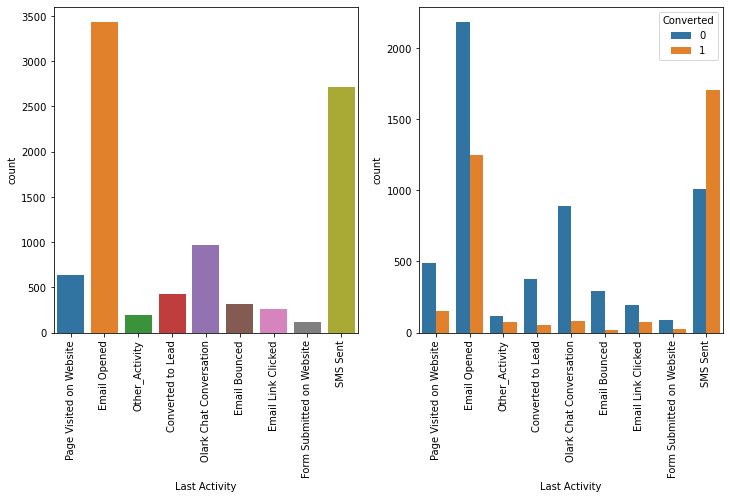

In [63]:
#Visualizing the variable after clubbing
predictors_plots("Last Activity")

#### The above graphs shows that:
*   Emailed Opened, SMS sent and Olark Chat Converstaion were the the major source of Last Activity.
*   SMS Sent has a the highest number of Converted (a little less than 1550) and outweigh the non-Converted (around 1000), followed by Email Opened (converted leads around 1250).



### Country

In [64]:
#Inspecting the values in the variable
leads["Country"].value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

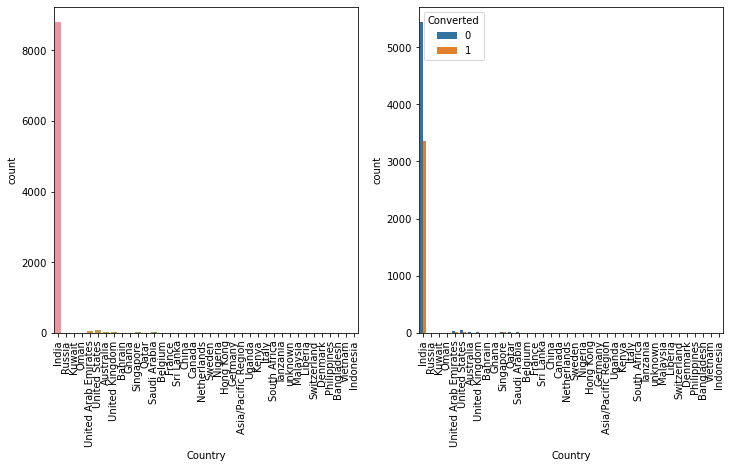

In [65]:
#Visualizing the variable
predictors_plots("Country")

In [66]:
cat_var_drop.append("Country")

##### The graphs clearly shows that nearly all the leads come from India 

### Specialization

In [67]:
#Inspecting the values of the variable
leads["Specialization"].value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

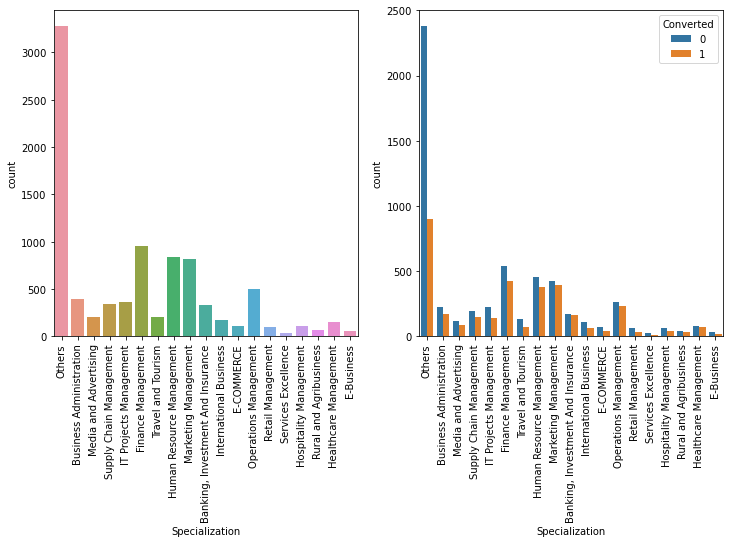

In [68]:
#Visualizing the variable
predictors_plots("Specialization")

###### In Specialization, most leads comes from 'Others' category. This category also has the maximum number of converted leads and non converted leads.

### What is your current occupation

In [69]:
#Inspecting the values of the variable
leads["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

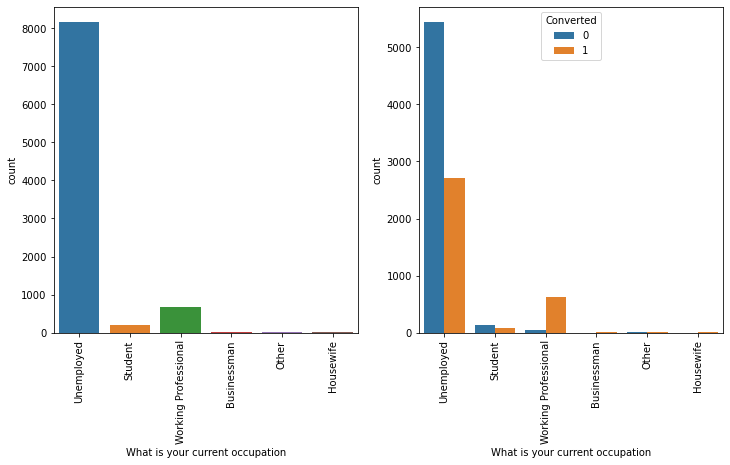

In [70]:
#Visualizing the variable
predictors_plots("What is your current occupation")

##### Most of the leads beyond to the Unemployed Category, followed by Working Professional and Students. Converted lead mainly comes from the Unemployed and the Working Professional. In the Working Professionals category, the converted leads outweigh the non-converted ones.

### What matters most to you in choosing a course

In [71]:
#Inspecting the values of the variable
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

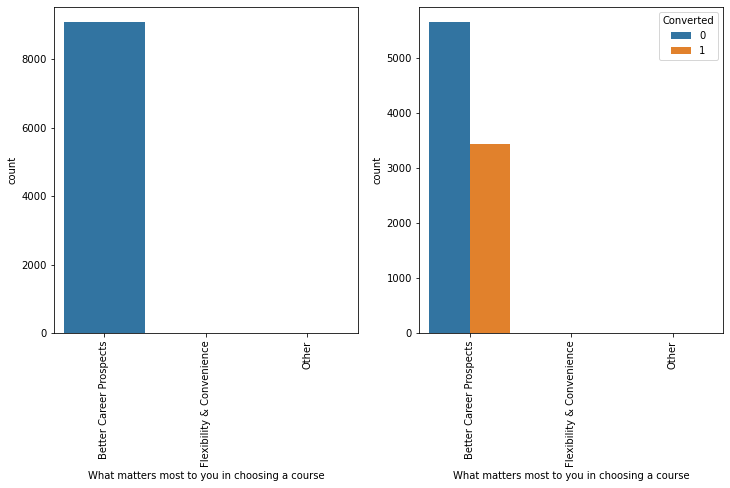

In [72]:
#Visualizing the variable
predictors_plots("What matters most to you in choosing a course")

In [73]:
cat_var_drop.append("What matters most to you in choosing a course")

##### Almost all the leads choose the course for Better Career Prospects.

### Search

In [74]:
#Inspecting the values of the variable
leads["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

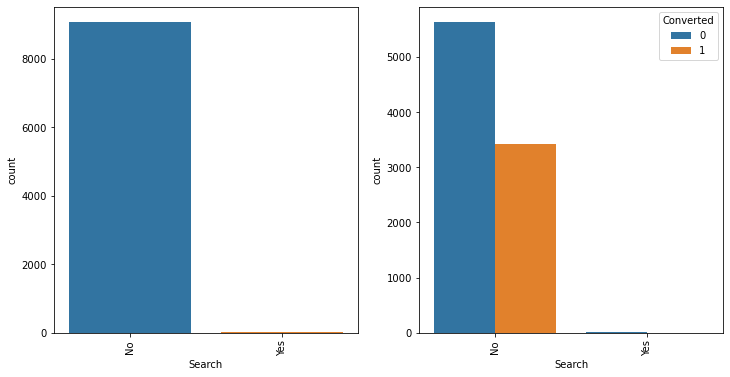

In [75]:
#Visualizing the variable
predictors_plots("Search")

In [76]:
cat_var_drop.append("Search")

##### Most the leads did not see the ad in Search.

### Magazine

In [77]:
#Inspecting the values of the variable
leads["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

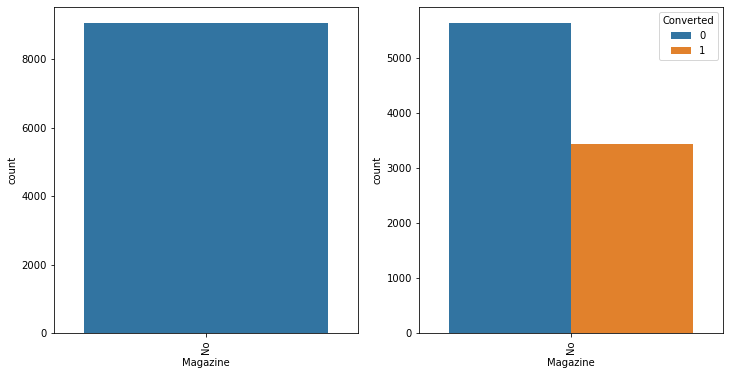

In [78]:
#Visualizing the variable
predictors_plots("Magazine")

In [79]:
cat_var_drop.append("Magazine")

###### All the leads did not come across the ad in the Magazine.

### Newspaper 

In [80]:
#Inspecting the values of the variable
leads["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

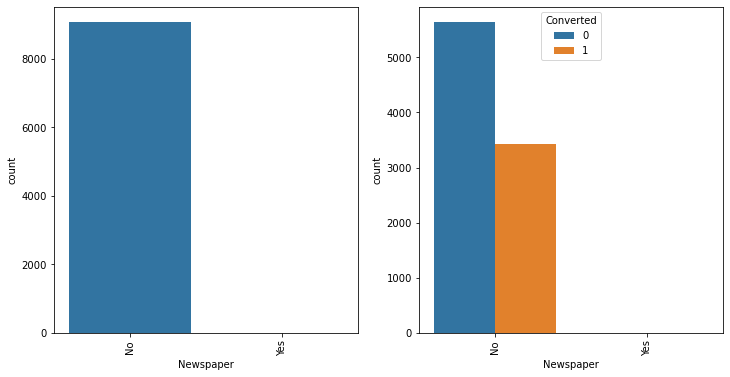

In [81]:
#Visualizing the variable
predictors_plots("Newspaper")

In [82]:
cat_var_drop.append("Newspaper")

###### Almost all the leads did not see the ad in the Newspaper.

### Newspaper Article

In [83]:
#Inspecting the values of the variable
leads["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

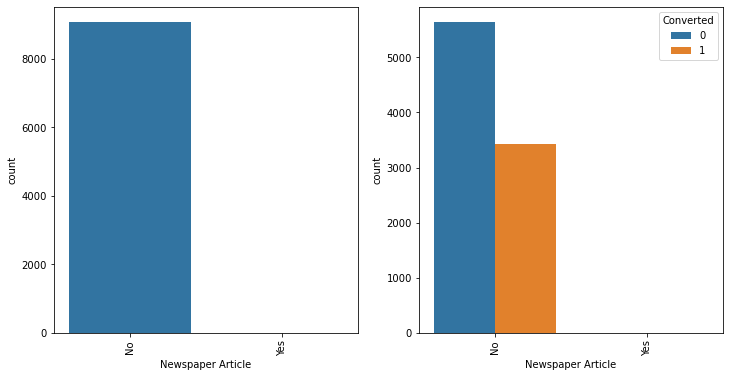

In [84]:
#Visualizing the variable
predictors_plots("Newspaper Article")

In [85]:
cat_var_drop.append("Newspaper Article")

In [86]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

##### Almost all the leads did not see the ad in the Newspaper Article.

### X Education Forums

In [87]:
#Inspecting the values of the variable
leads["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

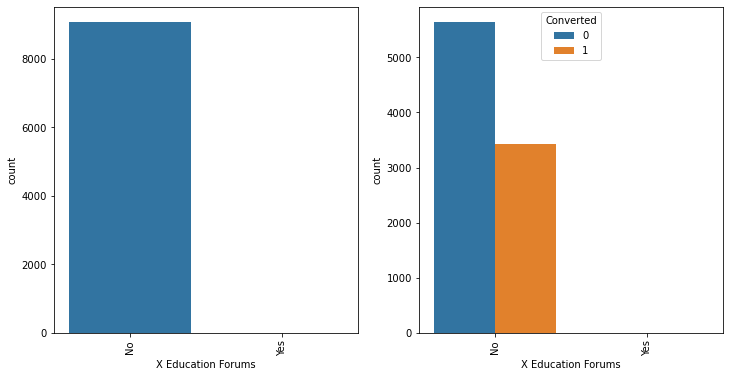

In [88]:
#Visualizing the variable
predictors_plots("X Education Forums")

In [89]:
cat_var_drop.append("X Education Forums")

##### Almost all the leads did not come across the ad in the X Education Forums

### Digital Advertisement

In [90]:
#Inspecting the values of the variable
leads["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

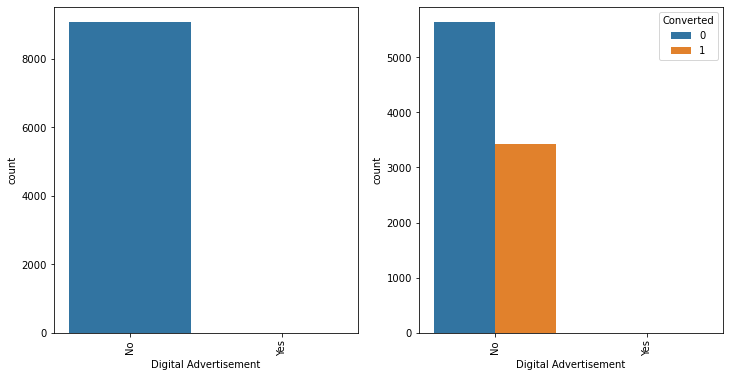

In [91]:
#Visualizing the variable
predictors_plots("Digital Advertisement")

In [92]:
cat_var_drop.append("Digital Advertisement")

###### Almost all the leads did not come across Digital Advertisement.

### Through Recommendations

In [93]:
#Inspecting the values of the variable
leads["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

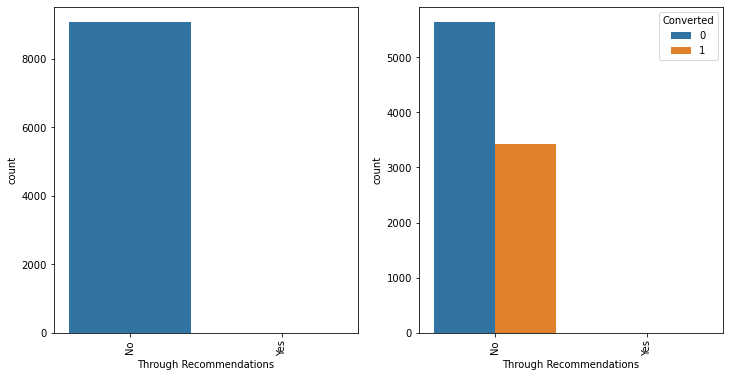

In [94]:
#Visualizing the variable
predictors_plots("Through Recommendations")

In [95]:
cat_var_drop.append("Through Recommendations")

###### Most of the leads did not come through Recommendations.

### Receive More Updates About Our Courses

In [96]:
#Inspecting the values of the variable
leads["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

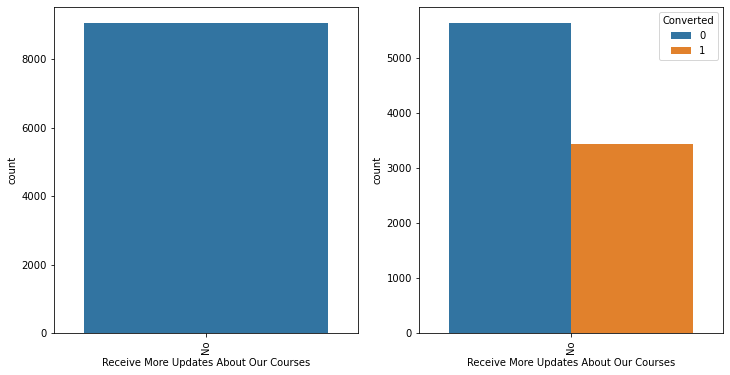

In [97]:
#Visualizing the variable
predictors_plots("Receive More Updates About Our Courses")

In [98]:
cat_var_drop.append("Receive More Updates About Our Courses")

###### All the leads did not receive more Updates about the Courses.

### Tags

In [99]:
#Inspecting the values of the variable
leads["Tags"].value_counts(normalize = True)*100

Will revert after reading the email                  58.882521
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0.363676
number not provided                                   0

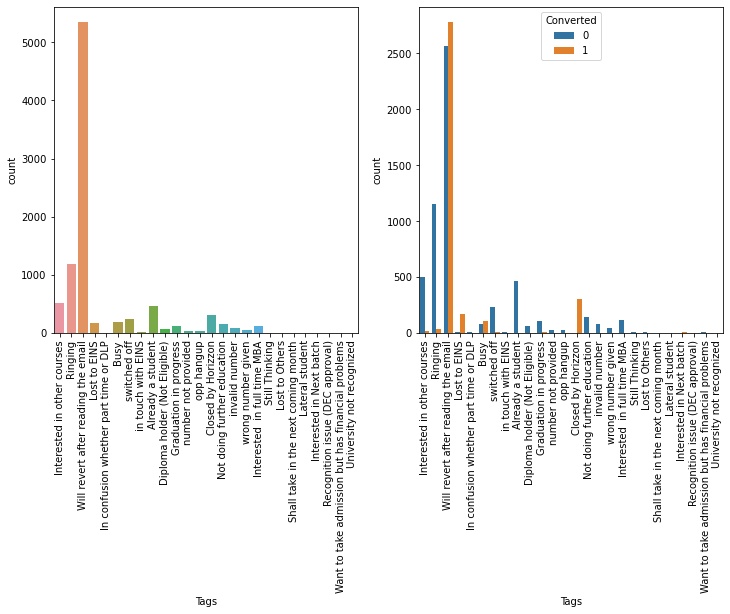

In [100]:
#Visualizing the variable
predictors_plots("Tags")

In [101]:
#Clubbing the categories of Tags
leads['Tags']= leads['Tags'].replace(['Interested  in full time MBA','Recognition issue (DEC approval)','University not recognized','Shall take in the next coming month', 'Lateral student','Interested in Next batch','In confusion whether part time or DLP','Want to take admission but has financial problems','Still Thinking', 'Lost to Others','in touch with EINS','number not provided','opp hangup','wrong number given','Diploma holder (Not Eligible)','invalid number','Graduation in progress','Interested in full time MBA','Not doing further education','Lost to EINS','Busy','switched off','Closed by Horizzon','Already a student','Interested in other courses','Ringing' ],'Ringing & Other Tags')

In [102]:
#Inspecting the values of the variable
leads["Tags"].value_counts(normalize = True)*100

Will revert after reading the email    58.882521
Ringing & Other Tags                   41.117479
Name: Tags, dtype: float64

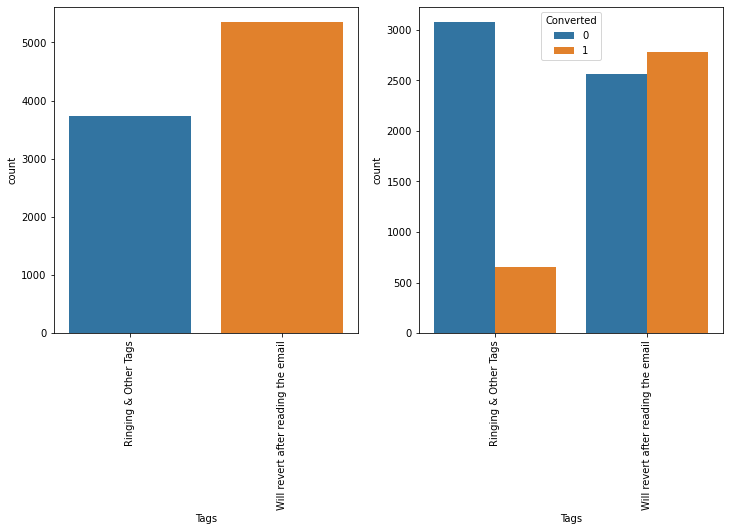

In [103]:
#Visualizing the variable
predictors_plots("Tags")

###### 'Will revert after reading the email' (5500) contributes the most in tags. The converted leads (a little less than 3000) in this category 'Will revert after reading the email' outweigh the non- converted leads (around 2500).

###### After clubbing smaller categories to Ringing and other Tags, the 'Will revert after reading the mail' still contributes the most to the tag column. It is the category that  contain a high number of converted leads (around 2550).

### Update me on Supply Chain Content

In [104]:
#Inspecting the values of a variable
leads["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

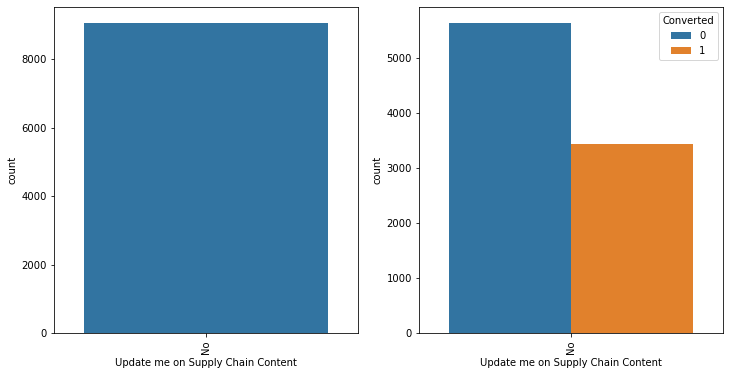

In [105]:
#Visualizing the variable
predictors_plots("Update me on Supply Chain Content")

In [106]:
cat_var_drop.append("Update me on Supply Chain Content")

##### All the leads said no to updating them on the Supply Chain Content.

### Get updates on DM Content

In [107]:
#Inspecting the values of a variable
leads["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

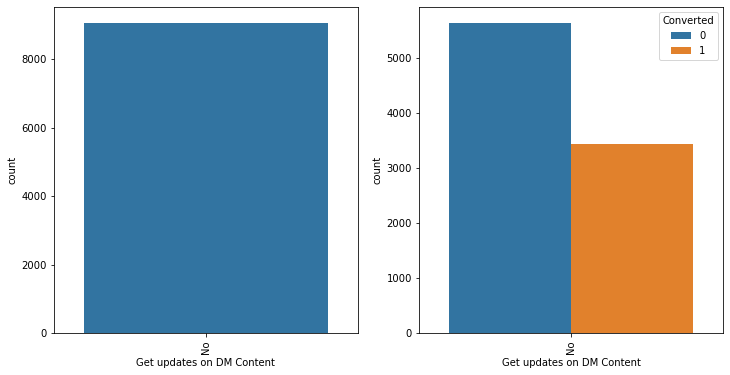

In [108]:
#Visualizing the variable
predictors_plots("Get updates on DM Content")

In [109]:
cat_var_drop.append("Get updates on DM Content")

###### All the leads said No to getting updates on DM Content.

### City

In [110]:
#Inspecting the values of a variable
leads["City"].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

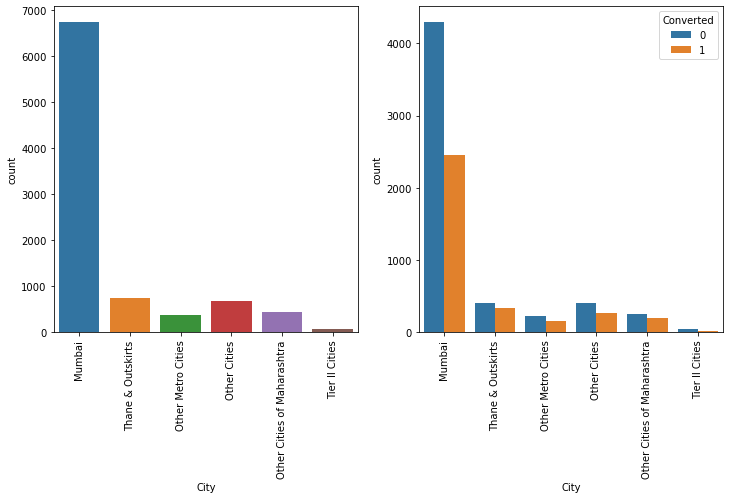

In [111]:
#Visualizing the variable
predictors_plots("City")

##### Most of the leads comes from Mumbai ( a little less than 7000) and natuallly most of the converted leads and non- converted leads comes from there. 

### I agree to pay the amount through cheque

In [112]:
#Inspecting the values of a variable
leads["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

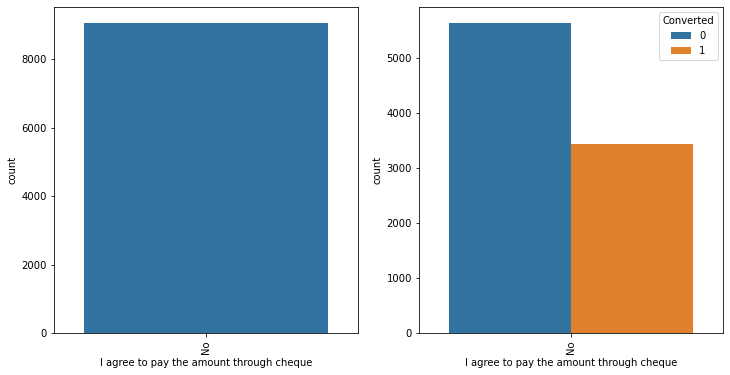

In [113]:
#Visualizing the variable
predictors_plots("I agree to pay the amount through cheque")

In [114]:
cat_var_drop.append("I agree to pay the amount through cheque")

###### All the leads did not agree to pay the amount through Cheque.

### A free copy of Mastering The Interview

In [115]:
#Inspecting the values of a variable
leads["A free copy of Mastering The Interview"].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

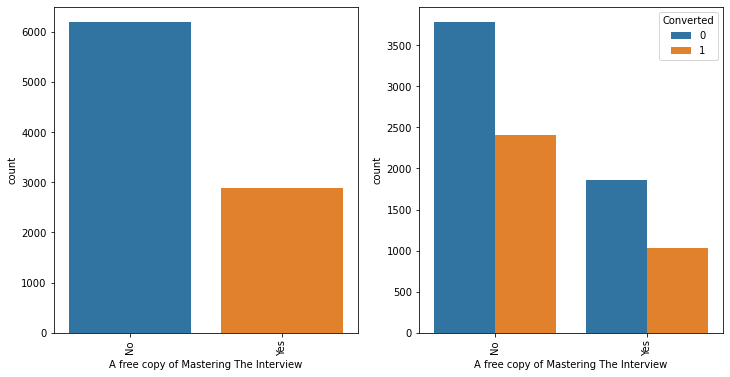

In [116]:
#Visualizing the variable
predictors_plots("A free copy of Mastering The Interview")

In [117]:
len(cat_var_drop)

14

###### Around 6000 leads did not have a free copy of 'Mastering The Interview' whereas nearly 3000 leads did have one. Nearly 2500 of those who fell in the 'No' category were converted leads.

### Last Notable Activity

In [118]:
#Inspecting the values of the variable
leads["Last Notable Activity"].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

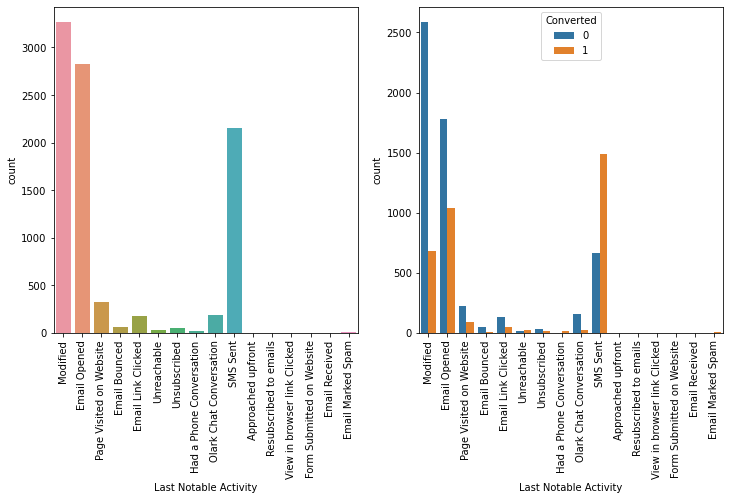

In [119]:
#Visualizing the variable
predictors_plots("Last Notable Activity")

In [120]:
#Creating a list of values to be clubbed
others_list = []
for i in leads["Last Notable Activity"].unique():
    if leads["Last Notable Activity"][leads["Last Notable Activity"] == i].count()<=100:
        others_list += [i]
print(others_list)

['Email Bounced', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received', 'Email Marked Spam']


In [121]:
#Clubbing the values
leads["Last Notable Activity"] = leads["Last Notable Activity"].replace(others_list,"Other_Activity")

In [122]:
#Inspecting the values after clubbing
leads["Last Notable Activity"].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Activity              158
Name: Last Notable Activity, dtype: int64

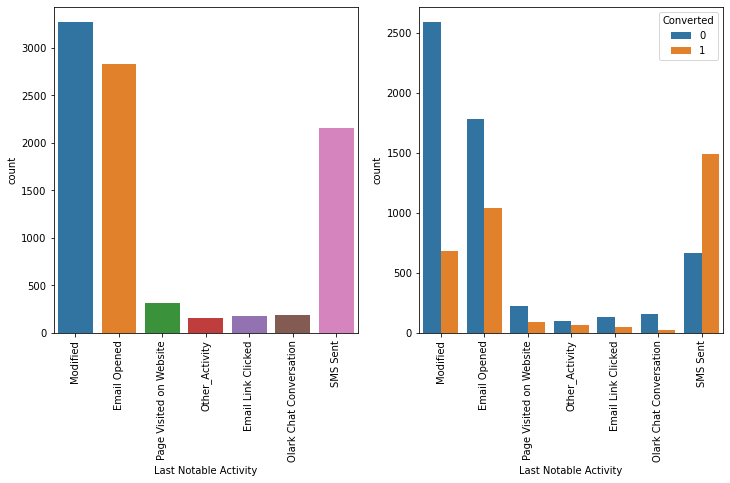

In [123]:
#Visualizing the variable after clubbing
predictors_plots("Last Notable Activity")

###### Modified, Email Opened and SMS Sent contributes the most to the Last Notable Activity. Here, most of the converted leads come from SMS Sent and outweighs the non-converted leads, followed by Email Opened and Modified.

In [124]:
cat_var_drop

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper',
 'Newspaper Article',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [125]:
leads = leads.drop(cat_var_drop,1)

In [126]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [127]:
#Numerical Variables
num_var = []
for i in leads.select_dtypes(include =["int64","float64"]).columns:
    num_var += [i]
len(num_var)

4

### Page Views Per Visit

In [128]:
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

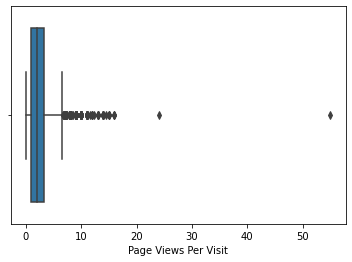

In [129]:
plt.figure(figsize=(6,4))
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [130]:
q_l = leads['Page Views Per Visit'].quantile(0.00)
q_h = leads['Page Views Per Visit'].quantile(0.95)

leads['Page Views Per Visit'] = leads['Page Views Per Visit'].clip(lower = q_l, upper = q_h)

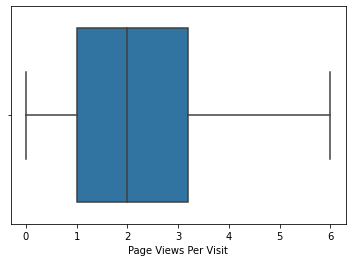

In [131]:
plt.figure(figsize=(6,4))
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

##### Now there are no more outliers in 'Page Views Per Visit. 

### Total Visits

In [132]:
leads['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

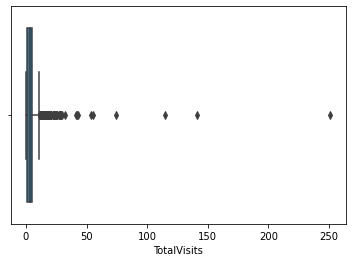

In [133]:
plt.figure(figsize=(6,4))
sns.boxplot(leads['TotalVisits'])
plt.show()

In [134]:
q_l = leads['TotalVisits'].quantile(0.00)
q_h = leads['TotalVisits'].quantile(0.95)

leads['TotalVisits'] = leads['TotalVisits'].clip(lower = q_l, upper = q_h)

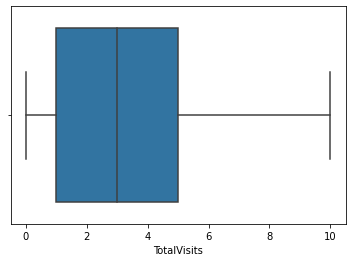

In [135]:
plt.figure(figsize=(6,4))
sns.boxplot(leads['TotalVisits'])
plt.show()

###### There are outliers in TotalVisits which needs to be treated.

### Total Time Spent on Website

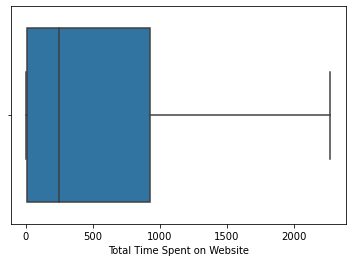

In [136]:
plt.figure(figsize=(6,4))
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

##### There are no outliers in this variable.

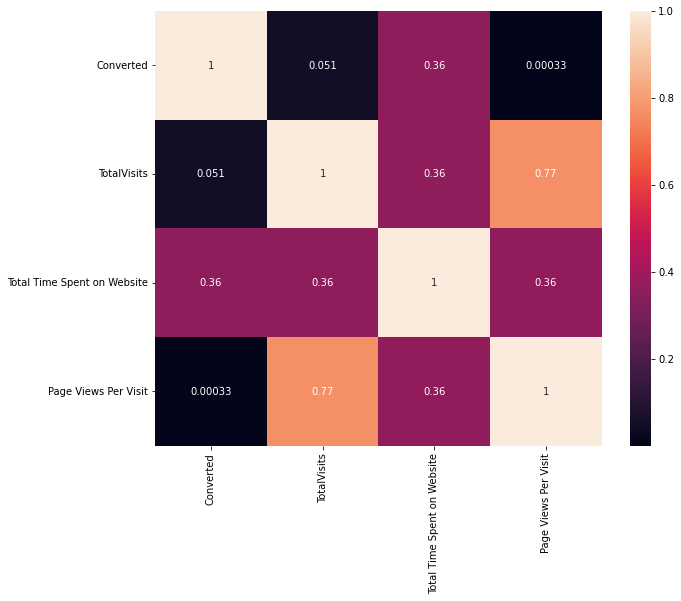

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(),annot = True)
plt.show()

##### The heat map shows that there is a strong correlation between Page Views Per Visit and Total Visits.

### Data Preparation

In [138]:
# Converting Yes to 1 and No to 0 in the 'Do Not Email column
leads["Do Not Email"] = leads["Do Not Email"].map({"Yes" : 1, "No" : 0})
leads["Do Not Email"]

0       0
1       0
2       0
3       0
4       0
       ..
9235    1
9236    0
9237    1
9238    0
9239    0
Name: Do Not Email, Length: 9074, dtype: int64

In [139]:
# Checking the first 5 rows of the dataframe after the conversion in 'Do Not Email' column
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Ringing & Other Tags,Mumbai,No,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing & Other Tags,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_Activity,Media and Advertising,Unemployed,Ringing & Other Tags,Mumbai,No,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [140]:
#Categorical Variables
cat_var = []
for i in leads.select_dtypes(include =["object"]).columns:
    cat_var += [i]
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [141]:
# Creating Dummy variables for the categorical variables
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Source',drop_first = True)
dummy = dummy.drop(['Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'Occupation')
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Ringing & Other Tags'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['City'], prefix  = 'City')
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['A free copy of Mastering The Interview'], prefix  = 'Free_copy')
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Other_Activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [142]:
# Dropping the categorical list
leads.drop(cat_var,1,inplace = True)

In [143]:
# Checking the last 5 rows of the dataframe
leads.tail()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Source_Facebook,Source_Google,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
9235,1,1,8.0,1845,2.67,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,0,2.0,238,2.00,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9237,1,0,2.0,199,2.00,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9238,0,1,3.0,499,3.00,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
9239,0,1,6.0,1279,3.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Train-Test Split

In [144]:
# Assigning 'Converted' column to y
y = leads["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [145]:
# Assigning all the variables to X but excluding 'Converted' by dropping it from X
X = leads.drop("Converted", axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Source_Facebook,Source_Google,Source_Olark Chat,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [146]:
# Splitting the dataset into 70% for Train set and 30% for Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [147]:
# Checking the first 5 rows in the X_train Set
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Source_Facebook,Source_Google,Source_Olark Chat,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
3009,0,2.0,397,2.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1012,1,2.0,190,2.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9226,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4750,0,2.0,1380,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7987,0,5.0,1584,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Feature Scaling

In [148]:
# Finding out the Numerical Variables in the dataset
num_var_train = []
for i in X_train.select_dtypes(include =["int64","float64"]).columns:
    num_var_train += [i]
num_var_train

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [149]:
#scaling of features of numerical variables
scaler = StandardScaler()
X_train[num_var_train] = scaler.fit_transform(X_train[num_var_train])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Source_Facebook,Source_Google,Source_Olark Chat,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
3009,-0.292645,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1012,3.417111,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9226,-0.292645,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4750,-0.292645,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7987,-0.292645,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


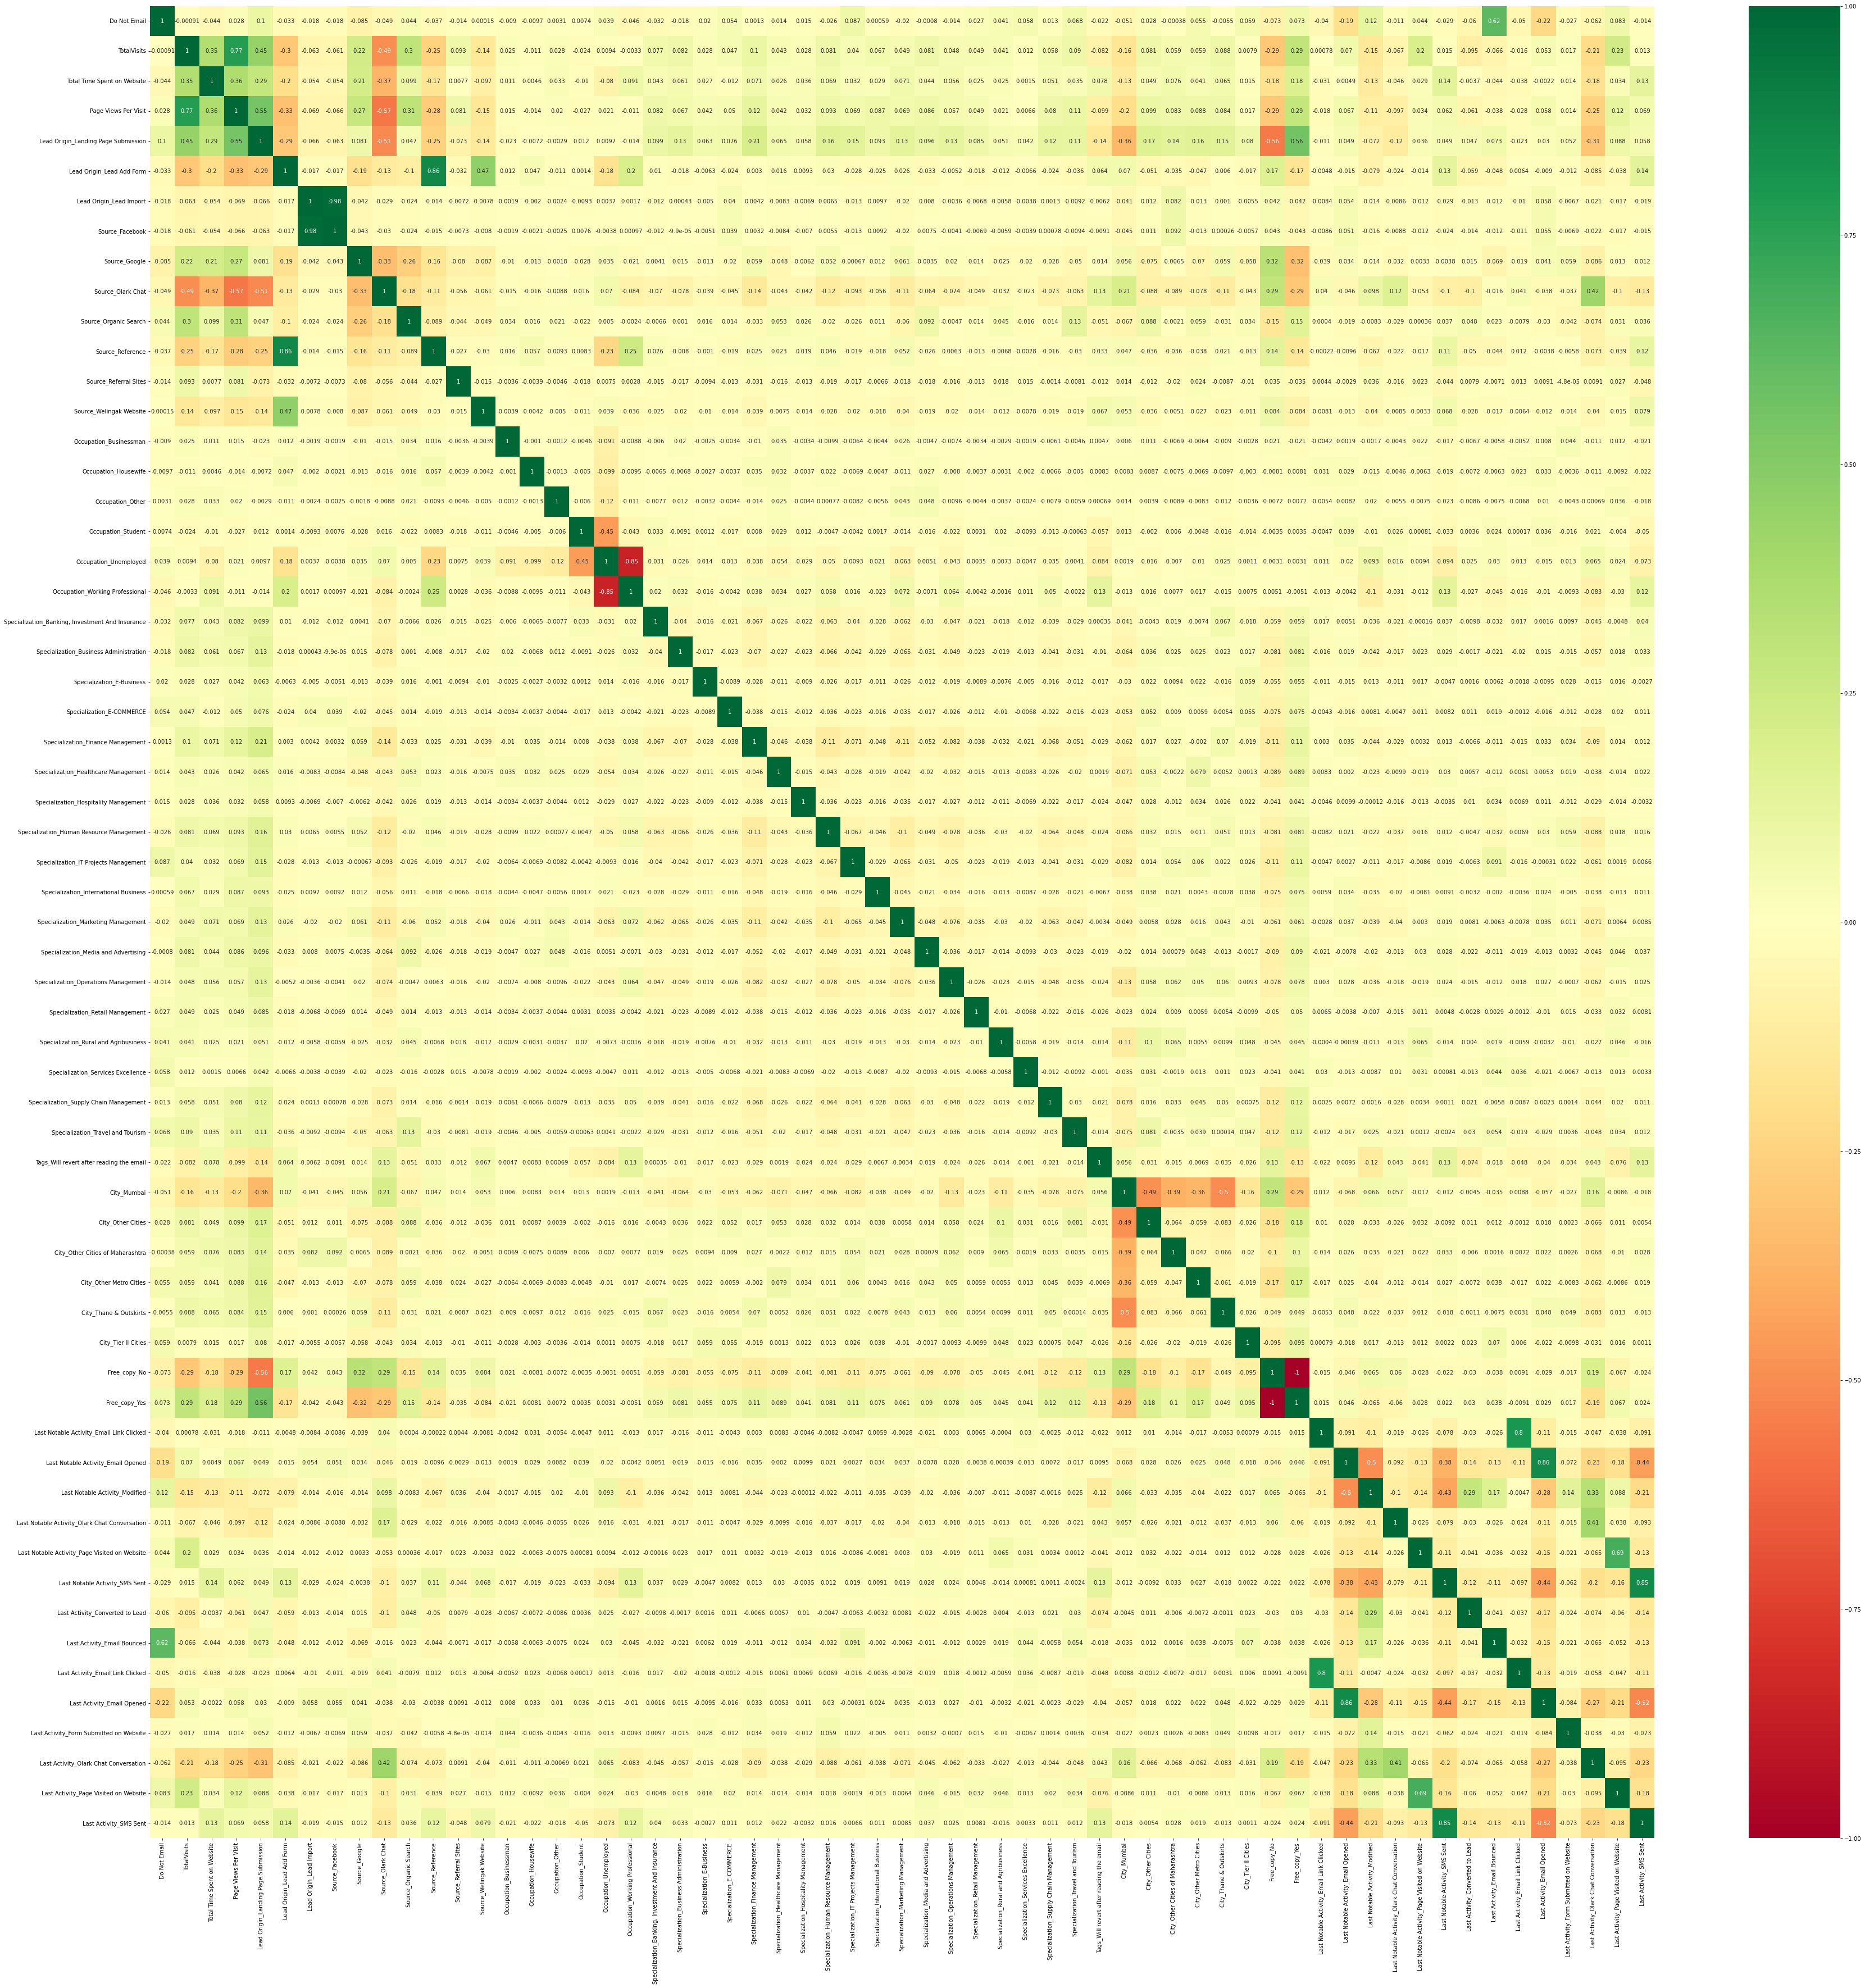

In [150]:
# Heatmap  Numeric Variables in the Train Dataset
plt.figure(figsize =(60,60))
sns.heatmap(X_train.corr(), cmap="RdYlGn", annot = True)
plt.show()

###### The heat map above shows the correlations among the variables.

### Model Building 

In [151]:
# Building a model using Logistic Regression 
lr = LogisticRegression()

In [152]:
# Running the RFE to select 15 variables
#rfe = RFE(lr, 15)    
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)      

#Conducting rfe.fit on the X and  Y train dataset
rfe = rfe.fit(X_train, Y_train)

In [153]:
rfe.support_

array([False, False,  True, False, False,  True,  True, False, False,
        True, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False,  True, False, False])

In [154]:
#Finding the selected and unselected columns by RFE and their rank 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 26),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Source_Facebook', False, 31),
 ('Source_Google', False, 44),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search', False, 43),
 ('Source_Reference', True, 1),
 ('Source_Referral Sites', False, 32),
 ('Source_Welingak Website', True, 1),
 ('Occupation_Businessman', False, 36),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 35),
 ('Occupation_Student', False, 30),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 2),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-Business', False, 3),
 ('Specialization_E-COMMERCE', False, 5),
 ('Specialization_Finance Management', False, 7

In [155]:
selected_variables = X_train.columns[rfe.support_]
selected_variables

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Source_Olark Chat', 'Source_Reference',
       'Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Specialization_Marketing Management',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [156]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Source_Facebook',
       'Source_Google', 'Source_Organic Search', 'Source_Referral Sites',
       'Occupation_Businessman', 'Occupation_Other', 'Occupation_Student',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Manage

In [157]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[selected_variables]

### Building Model

In [158]:
# VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train[selected_variables].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_variables].values, i) for i in range(X_train[selected_variables].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,62.41
4,Source_Reference,48.06
5,Source_Welingak Website,15.47
7,Occupation_Unemployed,2.95
10,Tags_Will revert after reading the email,2.63
3,Source_Olark Chat,1.83
11,Last Notable Activity_SMS Sent,1.49
14,Last Activity_Olark Chat Conversation,1.41
8,Occupation_Working Professional,1.40
0,Total Time Spent on Website,1.34


In [159]:
#BUILDING MODEL - 1

# Adding a constant
X_train_sm = sm.add_constant(X_train[selected_variables])

#Running the logistic regression
logm1 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2361.6
Date:                Tue, 18 Oct 2022   Deviance:                       4723.2
Time:                        20:51:28   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7625      0.248     -7.094      0.000      -2.249      -1.276
Total Time Spent on Website                  1.1325      0.043     26.228      0.000       1.048       1.217
Lead Origin_Lead Add Form                    1.8506      1.026      1.803      0.071      -0.161       3.862
Lead Origin_Lead Import                      1.6760      0.509      3.296      0.001       0.679       2.673
Source_Olark Chat                            0.9447      0.109      8.647      0.000       0.731       1.159
Source_Reference                             2.4789      1.053      2.354      0.019       0.415       4.543
Source_Welingak Website                      4.2373      1.268      3.341      0.001       1.752       6.723
Occupation_Housewife                        21.9043    1.5e+04      0.001      0.999   -2.94e+04    2.94e+04
Occupation_Unemployed                       -0.8753      0.247     -3.551      0.000      -1.358      -0.392
Occupation_Working Professional              1.9042      0.316      6.033      0.000       1.286       2.523
Specialization_Marketing Management          0.4392      0.126      3.485      0.000       0.192       0.686
Tags_Will revert after reading the email     1.9412      0.084     23.230      0.000       1.777       2.105
Last Notable Activity_SMS Sent               1.5487      0.088     17.592      0.000       1.376       1.721
Last Activity_Converted to Lead             -1.2194      0.229     -5.324      0.000      -1.668      -0.771
Last Activity_Email Bounced                 -2.4671      0.383     -6.448      0.000      -3.217      -1.717
Last Activity_Olark Chat Conversation       -1.5672      0.163     -9.615      0.000      -1.887      -1.248
============================================================================================================
"""

In [160]:
selected_variables = selected_variables.drop("Lead Origin_Lead Add Form",1)

In [161]:
# VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train[selected_variables].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_variables].values, i) for i in range(X_train[selected_variables].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Occupation_Unemployed,2.95
9,Tags_Will revert after reading the email,2.63
2,Source_Olark Chat,1.83
10,Last Notable Activity_SMS Sent,1.49
13,Last Activity_Olark Chat Conversation,1.41
7,Occupation_Working Professional,1.40
0,Total Time Spent on Website,1.34
3,Source_Reference,1.24
8,Specialization_Marketing Management,1.12
11,Last Activity_Converted to Lead,1.09


In [162]:
#BUILDING MODEL - 2

# Adding a constant
X_train_sm = sm.add_constant(X_train[selected_variables])

# Running the logistic Regression
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
# Getting the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2363.5
Date:                Tue, 18 Oct 2022   Deviance:                       4727.1
Time:                        20:51:28   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7630      0.248     -7.096      0.000      -2.250      -1.276
Total Time Spent on Website                  1.1314      0.043     26.235      0.000       1.047       1.216
Lead Origin_Lead Import                      1.6720      0.509      3.287      0.001       0.675       2.669
Source_Olark Chat                            0.9455      0.109      8.672      0.000       0.732       1.159
Source_Reference                             4.3261      0.247     17.506      0.000       3.842       4.810
Source_Welingak Website                      6.0850      0.749      8.126      0.000       4.617       7.553
Occupation_Housewife                        21.9045    1.5e+04      0.001      0.999   -2.94e+04    2.94e+04
Occupation_Unemployed                       -0.8728      0.247     -3.541      0.000      -1.356      -0.390
Occupation_Working Professional              1.9039      0.316      6.032      0.000       1.285       2.523
Specialization_Marketing Management          0.4424      0.126      3.514      0.000       0.196       0.689
Tags_Will revert after reading the email     1.9428      0.084     23.259      0.000       1.779       2.106
Last Notable Activity_SMS Sent               1.5496      0.088     17.607      0.000       1.377       1.722
Last Activity_Converted to Lead             -1.2219      0.229     -5.336      0.000      -1.671      -0.773
Last Activity_Email Bounced                 -2.4702      0.383     -6.458      0.000      -3.220      -1.720
Last Activity_Olark Chat Conversation       -1.5713      0.163     -9.645      0.000      -1.891      -1.252
============================================================================================================
"""

In [163]:
selected_variables = selected_variables.drop("Occupation_Housewife",1)

In [164]:
# VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train[selected_variables].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_variables].values, i) for i in range(X_train[selected_variables].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Occupation_Unemployed,2.95
8,Tags_Will revert after reading the email,2.62
2,Source_Olark Chat,1.83
9,Last Notable Activity_SMS Sent,1.49
12,Last Activity_Olark Chat Conversation,1.41
6,Occupation_Working Professional,1.40
0,Total Time Spent on Website,1.34
3,Source_Reference,1.24
7,Specialization_Marketing Management,1.12
10,Last Activity_Converted to Lead,1.09


In [165]:
#BUILDING MODEL - 3

# Adding a constant
X_train_sm = sm.add_constant(X_train[selected_variables])

# Running the logistic regression
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

#Getting the Summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2366.3
Date:                Tue, 18 Oct 2022   Deviance:                       4732.7
Time:                        20:51:28   Pearson chi2:                 7.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6606      0.242     -6.873      0.000      -2.134      -1.187
Total Time Spent on Website                  1.1307      0.043     26.239      0.000       1.046       1.215
Lead Origin_Lead Import                      1.6697      0.509      3.283      0.001       0.673       2.667
Source_Olark Chat                            0.9418      0.109      8.644      0.000       0.728       1.155
Source_Reference                             4.3335      0.247     17.564      0.000       3.850       4.817
Source_Welingak Website                      6.0839      0.749      8.124      0.000       4.616       7.552
Occupation_Unemployed                       -0.9743      0.240     -4.058      0.000      -1.445      -0.504
Occupation_Working Professional              1.8020      0.311      5.803      0.000       1.193       2.411
Specialization_Marketing Management          0.4396      0.126      3.492      0.000       0.193       0.686
Tags_Will revert after reading the email     1.9439      0.083     23.289      0.000       1.780       2.107
Last Notable Activity_SMS Sent               1.5480      0.088     17.587      0.000       1.375       1.721
Last Activity_Converted to Lead             -1.2264      0.229     -5.356      0.000      -1.675      -0.778
Last Activity_Email Bounced                 -2.4791      0.383     -6.476      0.000      -3.229      -1.729
Last Activity_Olark Chat Conversation       -1.5732      0.163     -9.655      0.000      -1.893      -1.254
============================================================================================================
"""

In [166]:
# VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train[selected_variables].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_variables].values, i) for i in range(X_train[selected_variables].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Occupation_Unemployed,2.95
8,Tags_Will revert after reading the email,2.62
2,Source_Olark Chat,1.83
9,Last Notable Activity_SMS Sent,1.49
12,Last Activity_Olark Chat Conversation,1.41
6,Occupation_Working Professional,1.40
0,Total Time Spent on Website,1.34
3,Source_Reference,1.24
7,Specialization_Marketing Management,1.12
10,Last Activity_Converted to Lead,1.09


###### All the variables are clearly significant with p-values less than 0.05. and the vif values less than 5.

### Predicting a Train model

In [167]:
# Predicted values on the train set
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

3009    0.294796
1012    0.268081
9226    0.063102
4750    0.959092
7987    0.412495
1281    0.869156
2880    0.156109
4971    0.743784
7536    0.917400
1248    0.369552
dtype: float64

In [168]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.29479617, 0.26808064, 0.06310211, 0.95909164, 0.41249497,
       0.8691562 , 0.15610896, 0.74378403, 0.91739994, 0.36955191])

##### Creating the dataframe with the Real Converted flag and the predicted probabilities

In [169]:
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_prob':Y_train_pred})
Y_train_pred_final['Prospect ID'] = Y_train.index
Y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.294796,3009
1,0,0.268081,1012
2,0,0.063102,9226
3,1,0.959092,4750
4,1,0.412495,7987


##### Making a new column 'Predicted' where 1 is given if Converted_prob is greater than 0.5 otherwise it is assigned 0.

In [170]:
Y_train_pred_final['Predicted'] = Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [171]:
# Head Check
Y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.294796,3009,0
1,0,0.268081,1012,0
2,0,0.063102,9226,0
3,1,0.959092,4750,1
4,1,0.412495,7987,0


In [172]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
confusion

array([[3563,  342],
       [ 602, 1844]], dtype=int64)

In [173]:
# Accuracy Check.
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted)

0.8513619902377578

##### Accuracy is about 85%.

In [174]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [175]:
# Sensitivity 
TP / float(TP+FN)

0.7538838920686836

###### Sensitivity is 75%.

In [176]:
# Specificity
TN / float(TN+FP)

0.9124199743918053

###### Specificity is 91%.

In [177]:
# False Postive Rate 
print(FP/ float(TN+FP))

0.08758002560819463


###### False Postive value is around 8.7%.

In [178]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8435498627630376


###### Positive predictive value is around 84%.

In [179]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8554621848739495


###### Negative predicted value is 85%.

#### Drawing a ROC Curve 

In [180]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [181]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob, drop_intermediate = False )

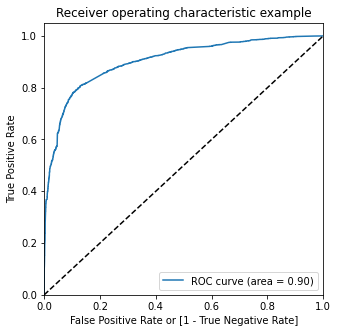

In [182]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

###### The more the ROC curve is closer to the top side of the left corner, the more accurate is the model. Since this is shown in the above graph, it suggests that the given model is on the accurate side.

### Searching for the Optimal Cutoff Point

In [183]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.294796,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268081,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.063102,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.959092,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.412495,7987,0,1,1,1,1,1,0,0,0,0,0


In [184]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.672020  0.952576  0.496287
0.2   0.2  0.748386  0.910057  0.647119
0.3   0.3  0.808377  0.860589  0.775672
0.4   0.4  0.847426  0.793949  0.880922
0.5   0.5  0.851362  0.753884  0.912420
0.6   0.6  0.841757  0.693786  0.934443
0.7   0.7  0.807904  0.570319  0.956722
0.8   0.8  0.789639  0.485691  0.980026
0.9   0.9  0.752322  0.373262  0.989757


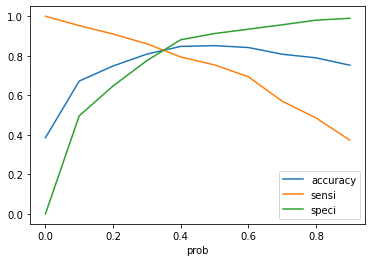

In [185]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [186]:
Y_train_pred_final['final_Predicted'] = Y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
Y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.294796,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.268081,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.063102,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.959092,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.412495,7987,0,1,1,1,1,1,0,0,0,0,0,1


In [187]:
Y_train_pred_final['Lead_Score'] = Y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
Y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.294796,3009,0,29
1,0,0.268081,1012,0,27
2,0,0.063102,9226,0,6
3,1,0.959092,4750,1,96
4,1,0.412495,7987,1,41


In [188]:
# checking if 80% cases are correctly predicted based on the converted column.
checking_df = Y_train_pred_final.loc[Y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1981
0     465
Name: final_Predicted, dtype: int64

In [189]:
# check the accuracy of final_predicted conversions
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted)

0.8433317587781451

###### The accuracy score of the train model is around 84%.

In [190]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted )
confusion2

array([[3375,  530],
       [ 465, 1981]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Sensitivity 
TP / float(TP+FN)

0.8098937040065413

In [193]:
# Specificity
TN / float(TN+FP)

0.8642765685019206

**Inference:**
So as we can see above the model seems to be performing well. The ROC curve has a value of **0.90**, which is very good. We have the following values for the Train Data:

*   **Accuracy** : **84.33%** 
*   **Sensitivity** : **80.98%**
*   **Specificity** : **86.42%**


In [194]:
# False Postive Rate 
print(FP/ float(TN+FP))

0.1357234314980794


##### False Positive rate is 14%.

In [195]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7889287136598965


###### The positive predictive rate is 79%.

In [196]:
# Negative predictive value
print (TN / float(TN+ FN))

0.87890625


###### The negative predictive value is 88%.

### Precision and Recall

In [197]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted )
confusion

array([[3375,  530],
       [ 465, 1981]], dtype=int64)

In [198]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7889287136598965

###### The Precision value is 79%.

In [199]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8098937040065413

###### The Recall value is 81%.

In [200]:
precision_score(Y_train_pred_final.Converted , Y_train_pred_final.final_Predicted)

0.7889287136598965

###### The precision score on the train dataset is 79%.

In [201]:
recall_score(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted)

0.8098937040065413

##### The recall score on the train dataset is 81%.

### Precision and Recall Trade-off

In [202]:
# Creating precision recall curve
Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

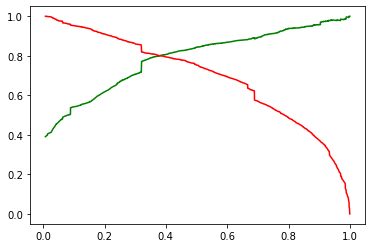

In [203]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### The result of the graph also give us a value somewhere close to 0.4 .

### Predictions on the test set

In [204]:
#scaling test set

# Selecting the numerical variables
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

# Doing a fit_Transform on the variables in the test set
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

#Checking out the top 5 rows of the test set
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Source_Facebook,Source_Google,Source_Olark Chat,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
3271,-0.292789,0.304501,-0.591008,0.998931,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1490,-0.292789,0.666261,1.894051,1.564920,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7936,-0.292789,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4216,-0.292789,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,-0.292789,1.751544,-0.578179,2.130909,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [205]:
# Assigning  selected variables in the X_test 
X_test = X_test[selected_variables]

#Checking out the top 5 rows of X_test 
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Import,Source_Olark Chat,Source_Reference,Source_Welingak Website,Occupation_Unemployed,Occupation_Working Professional,Specialization_Marketing Management,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation
3271,-0.591008,0,0,0,0,1,0,0,1,0,0,0,0
1490,1.894051,0,0,0,0,0,1,0,1,0,0,0,0
7936,-0.743117,0,0,0,0,1,0,0,1,0,0,0,0
4216,-0.878732,0,0,1,0,0,0,0,0,0,0,0,0
3830,-0.578179,0,0,0,0,1,0,0,1,0,0,0,0


In [206]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [207]:
#Checking the shape
X_test_sm.shape

(2723, 14)

#### Making predictions on the Test Set

In [208]:
Y_test_pred = res.predict(X_test_sm)

In [209]:
Y_test_pred[:10]

3271    0.204365
1490    0.985611
7936    0.177815
4216    0.842829
3830    0.206733
1800    0.777166
6507    0.140264
4821    0.098390
4223    0.985182
4714    0.322402
dtype: float64

In [210]:
# Converting y_pred to a dataframe which is an array
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [211]:
# Head Check
Y_pred_1.head()

,0
3271,0.204365
1490,0.985611
7936,0.177815
4216,0.842829
3830,0.206733


In [212]:
# Converting y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [213]:
# Inserting Prospect ID to index
Y_test_df['Prospect ID'] = Y_test_df.index

In [214]:
# Removing index for both dataframes to append them side by side 
Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [215]:
# Appending y_test_df and y_pred_1
Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

In [216]:
# Checking the top 5 rows of Y_pred_final 
Y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.204365
1,1,1490,0.985611
2,0,7936,0.177815
3,1,4216,0.842829
4,0,3830,0.206733


In [217]:
# Renaming the column 
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Converted_prob'})

### Assigning Lead Score

In [218]:
# Rearranging the columns
Y_pred_final = Y_pred_final[['Prospect ID','Converted','Converted_prob']]
Y_pred_final['Lead_Score'] = Y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [219]:
# Head Check after assigning lead scores
Y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.204365,20
1,1490,1,0.985611,99
2,7936,0,0.177815,18
3,4216,1,0.842829,84
4,3830,0,0.206733,21


In [220]:
# Creating a Final_Predicted Column where it is assigned 1 when Converted_prob is greater than 0.35 otherwise its a 0
Y_pred_final['final_Predicted'] = Y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [221]:
# Checking out the new column
Y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3271,0,0.204365,20,0
1,1490,1,0.985611,99,1
2,7936,0,0.177815,18,0
3,4216,1,0.842829,84,1
4,3830,0,0.206733,21,0


In [222]:
# Checking out how many 1s and 0s are there in the final_predicted column
checking_test_df = Y_pred_final.loc[Y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    776
0    213
Name: final_Predicted, dtype: int64

In [223]:
# Accuracy Check.
metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_Predicted)

0.8336393683437385

###### The accuracy score is 83.36%.

In [224]:
# Creating a confusion matrix
confusion2 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_Predicted )
confusion2

array([[1494,  240],
       [ 213,  776]], dtype=int64)

In [225]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [226]:
# Sensitivity 
TP / float(TP+FN)

0.7846309403437816

###### Sensitivity is 78%.

In [227]:
# Specificity
TN / float(TN+FP)

0.8615916955017301

###### Specificity is 86%.

### Precision and Recall metrics for the test set

In [228]:
precision_score(Y_pred_final.Converted , Y_pred_final.final_Predicted)

0.7637795275590551

##### The Precision Score is 76%.

In [229]:
recall_score(Y_pred_final.Converted, Y_pred_final.final_Predicted)

0.7846309403437816

###### The Recall score is 78%.

**Inference:**
After running the model on the Test Data these are the figures we obtain:

*  **Accuracy : 83.36%** 
*  **Sensitivity :78.46%**
* **Specificity : 86.15%**





### Conclusion & Findings:

**While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.**

**Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
Hence overall this model seems to be good.**

**All the marketing campaigns have resulted redundant as all the advertising variable have not contributed to lead conversion.**

**Company has to use its advertising stratergies in future to gain more conversions.**

**Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are ** :

*       **Total Time Spent on the Website**
*	    **Lead Source**
*	    **Current Occupation**
